## Collaborative Notebook for EDA and Feature Engineering of Taxi Data

A good place to start might be how taxis are regulated. I've never taken a taxi in NY, but I believe they're metered and have formulae for calculating fares even though it might be complex (e.g. different rates depending on whether the taxi is moving or stuck in traffic, etc.).

I found [this website](http://www.nyc.gov/html/tlc/html/passenger/taxicab_rate.shtml) that has a run down of some of the dimensions involved in calculating fares.

There are some data quality issues that we'll need to deal with, too. Looks there are at least a few zero values in the lat and lon fields. Also, the timestamp is in UTC. Pandas has some timezone conversion functions, so that shouldn't be to difficult to correct. It would be worth manually checking a few dozen to make sure that they have converted correctly. I think those built in functions take into account all of the special cases like daylight savings. We can double check, though.

![map](outsideny.png)

Here are some possible features that occurred to me and we might explore:

* distance as the crow flies
* actual driving distance
* time of day
* day of the week
* crosses bridge (tolls) (binary variable)
* inter-borough/intra-borough
* holiday (binary variable)
* estimated trip time (data doesn't have start and stop time, so this could take some work)
* proximity to landmarks for pickup or dropoff
* season/month



If you're thinking about doing the Coursera specialization, the first course is mostly the philosophy of ML according to Google. If you don't need all that, I recommend you start at Python notebooks in the cloud about 2/3 of the way through the course.

In [36]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [16]:
taxi_data = pd.read_csv("train_subset.csv")
taxi_data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,1,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,3,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,4,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,5,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [22]:
taxi_data.shape

(100000, 9)

In [25]:
test = taxi_data[taxi_data.pickup_latitude != 0]
test = test[test.pickup_longitude != 0]
test = test[test.dropoff_latitude != 0]
taxi_data = test[test.dropoff_longitude !=0]



In [33]:
taxi_data['passenger_count'].value_counts()

1    68170
2    14307
5     6887
3     4217
4     2044
6     2011
0      358
Name: passenger_count, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000228802DADA0>]],
      dtype=object)

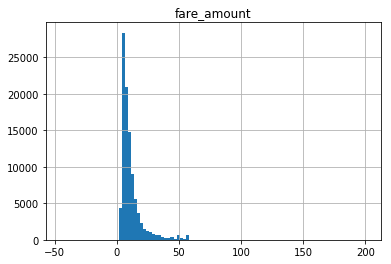

In [49]:
binwidth = 0.1
taxi_data.hist(column="fare_amount", bins=100)

In [50]:
neg_fares = taxi_data[taxi_data.fare_amount <= 0]
neg_fares.shape

(11, 9)

In [51]:
neg_fares

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2039,2040,2010-03-09 23:37:10.0000005,-2.9,2010-03-09 23:37:10 UTC,-73.789450,40.643498,-73.788665,40.641952,1
2486,2487,2015-03-22 05:14:27.0000001,-2.5,2015-03-22 05:14:27 UTC,-74.000031,40.720631,-73.999809,40.720539,1
10002,10003,2010-02-15 14:26:01.0000003,0.0,2010-02-15 14:26:01 UTC,-73.987115,40.738808,-74.005911,40.713960,1
13032,13033,2013-08-30 08:57:10.0000002,-3.0,2013-08-30 08:57:10 UTC,-73.995062,40.740755,-73.995885,40.741357,4
27891,27892,2015-05-15 21:40:28.00000010,0.0,2015-05-15 21:40:28 UTC,-74.077927,40.805714,-74.077919,40.805721,1
36722,36723,2015-04-30 15:19:45.0000003,-2.5,2015-04-30 15:19:45 UTC,-73.952187,40.790112,-73.950043,40.792839,1
42337,42338,2015-03-09 10:29:46.0000004,-5.0,2015-03-09 10:29:46 UTC,-73.990974,40.755985,-73.980820,40.759869,1
47302,47303,2010-03-18 19:13:39.0000002,0.0,2010-03-18 19:13:39 UTC,-73.942346,40.806269,-73.942463,40.806129,1
56748,56749,2015-06-26 01:13:18.0000002,-5.0,2015-06-26 01:13:18 UTC,-73.979797,40.743240,-73.981216,40.737240,6
58937,58938,2010-02-19 23:47:10.0000002,-44.9,2010-02-19 23:47:10 UTC,-73.871120,40.773902,-73.676533,40.786890,1
